## Simulation 1 - Vary temperature

In [1]:
#Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import mdsim as md
import analysisfunctions as af

#Define constants
mass = 1.0 #set to arbitrary units for simplicity
sigma = 1.0 #characteristic length scale in the Lennard-Jones potential, set to 1.
kB = 1.0 #Boltzmann constant, set to 1 for reduced units
k = 1.0  # Spring constant
n_particles = 20  # Number of particles
epsilon_repulsive = 1.0  # Depth of repulsive LJ potential
epsilon_attractive = 0.5  # Depth of attractive LJ potential
cutoff = 2**(1/6) * sigma # Cutoff distance
dt = 0.01  # Time step
box_size = 100.0  # Size of the cubic box
r0 = 1.0  # Equilibrium bond length
total_steps = 10000  # Number of steps
rescale_interval = 100  # Steps between velocity rescaling

#Random seed
np.random.seed(42)

In [2]:
def plot_polymer_3d(positions, path, box_size=None, title="Polymer"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.plot(positions[:,0], positions[:,1], positions[:,2], marker="o", markersize = 3)
    if box_size is not None:
        ax.set_xlim(0, box_size); ax.set_ylim(0, box_size); ax.set_zlim(0, box_size)
    ax.set_title(title)
    fig.savefig(path, dpi=300, bbox_inches='tight')

    #plt.show()

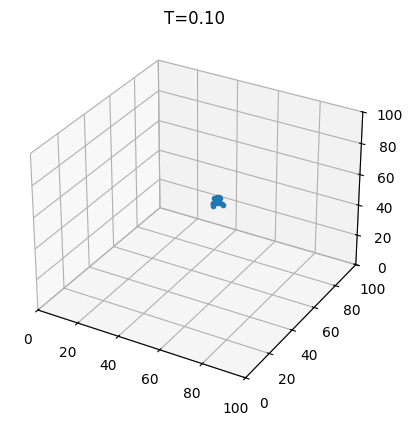

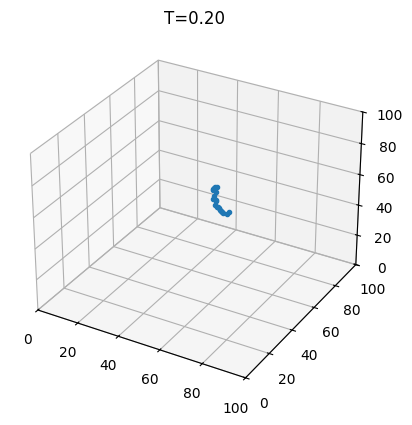

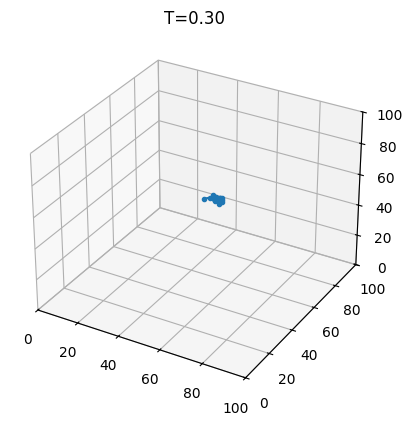

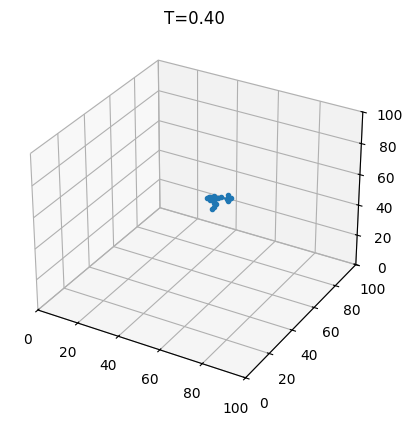

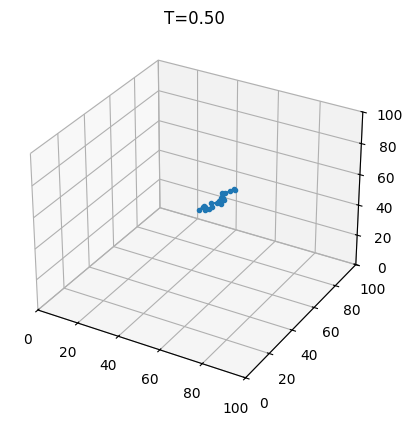

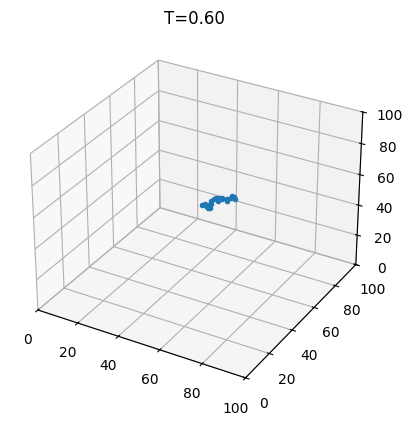

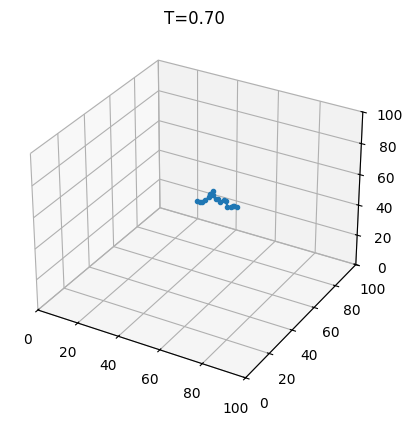

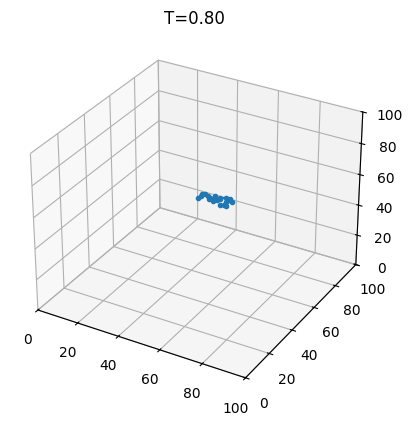

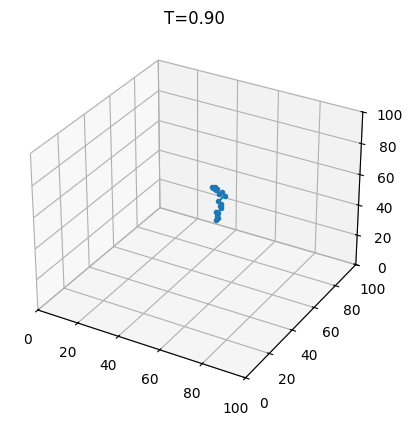

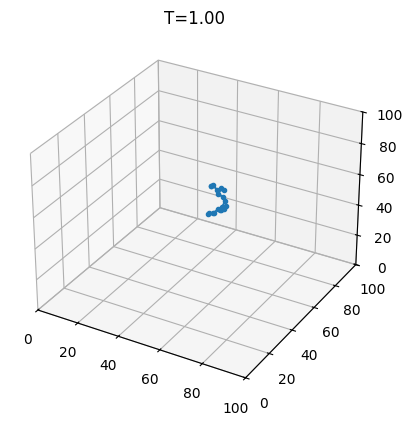

In [3]:
#Run simulation - vary temperature at n_particles = 20

# Arrays to store properties
temperatures = np.linspace(0.1, 1.0, 10)
Rg_values = []
Ree_values = []
potential_energies = []

for T in temperatures:
    # Set target temperature
    target_temperature = T

    # (Re-initialize positions and velocities)
    positions = md.initialize_chain(n_particles, box_size, r0)
    velocities = md.initialize_velocities(n_particles, target_temperature, mass)
    # Run simulation
    for step in range(total_steps):
        # Compute forces
        forces_harmonic = md.compute_harmonic_forces(positions, k, r0, box_size)
        forces_repulsive = md.compute_lennard_jones_forces(positions, epsilon_repulsive, sigma, box_size, 'repulsive')
        forces_attractive = md.compute_lennard_jones_forces(positions, epsilon_attractive, sigma, box_size, 'attractive')
        total_forces = forces_harmonic + forces_repulsive + forces_attractive
        
        # Integrate equations of motion
        positions, velocities, total_forces = md.velocity_verlet(positions, velocities, total_forces, dt, mass)
        
        # Apply thermostat
        if step % rescale_interval == 0:
            velocities = md.rescale_velocities(velocities, target_temperature, mass)
        
    # Compute properties
    # Compute radius of gyration and end to end distance
    Rg = af.calculate_radius_of_gyration(positions)
    Ree = af.calculate_end_to_end_distance(positions)
    Rg_values.append(Rg)
    Ree_values.append(Ree)
    # Compute potential energies
    harmonic_pe = af.calculate_harmonic_pe(positions, k)
    repulsive_lj_pe = af.calculate_lj_pe(positions, 'repulsive')
    attractive_lj_pe = af.calculate_lj_pe(positions, 'attractive')
    potential_energies.append(harmonic_pe + repulsive_lj_pe + attractive_lj_pe)

    plot_polymer_3d(positions, path = f"simulation1_images/T={T:.2f}.png", box_size=100.0, title=f"T={T:.2f}")


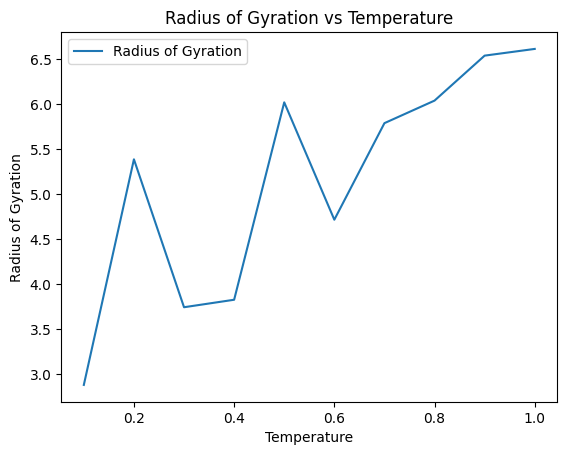

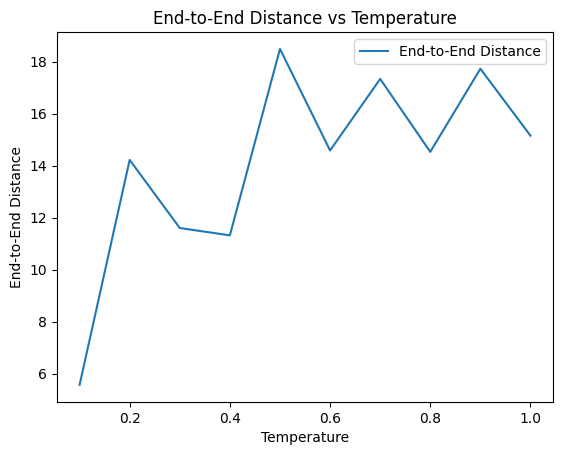

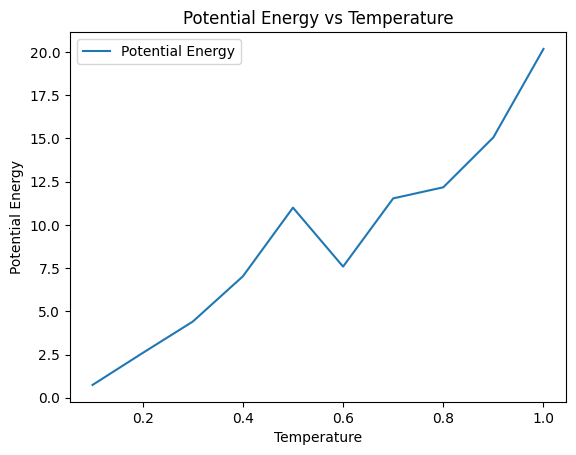

In [4]:
#Plot Simulation 1
# Plotting
plt.figure()
plt.plot(temperatures, Rg_values, label='Radius of Gyration')
plt.xlabel('Temperature')
plt.ylabel('Radius of Gyration')
plt.title('Radius of Gyration vs Temperature')
plt.legend()
plt.show()

plt.figure()
plt.plot(temperatures, Ree_values, label='End-to-End Distance')
plt.xlabel('Temperature')
plt.ylabel('End-to-End Distance')
plt.title('End-to-End Distance vs Temperature')
plt.legend()
plt.show()

plt.figure()
plt.plot(temperatures, potential_energies, label='Potential Energy')
plt.xlabel('Temperature')
plt.ylabel('Potential Energy')
plt.title('Potential Energy vs Temperature')
plt.legend()
plt.show()

## Simulation 2 - Find optimal k at low temperature

/var/folders/b2/cy922l_54kq_yfrclxsgg8jr0000gn/T/ipykernel_14699/3192910551.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


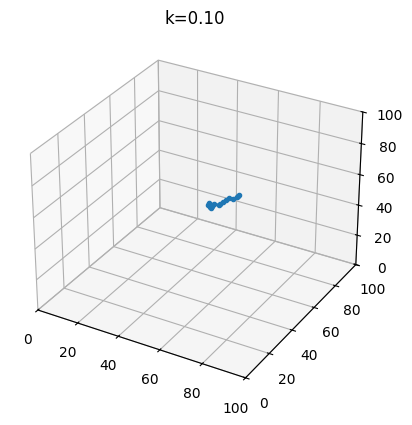

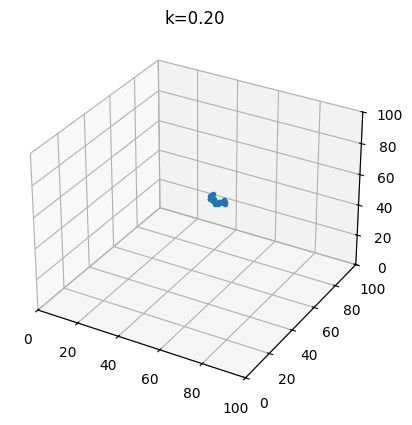

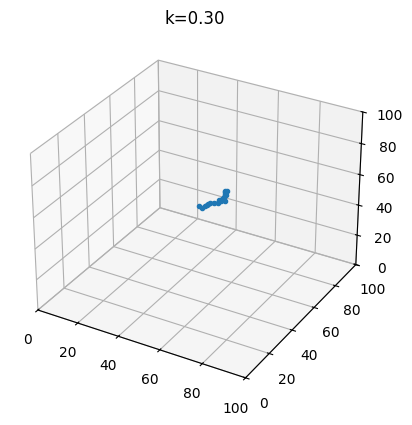

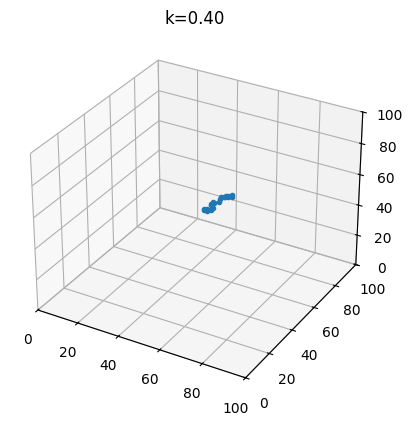

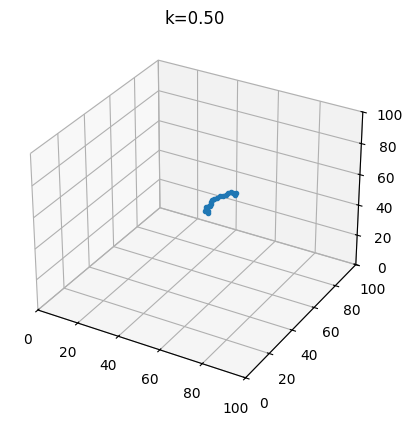

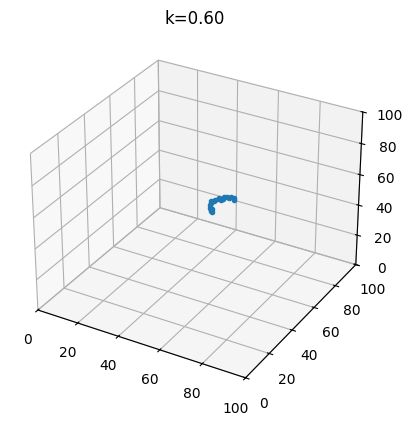

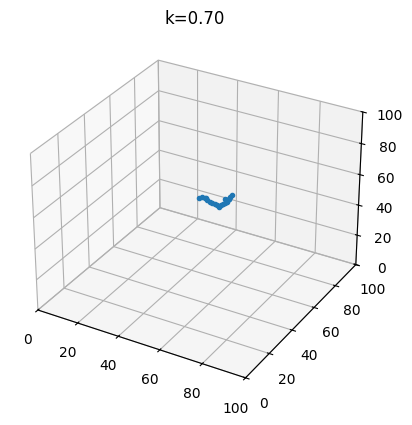

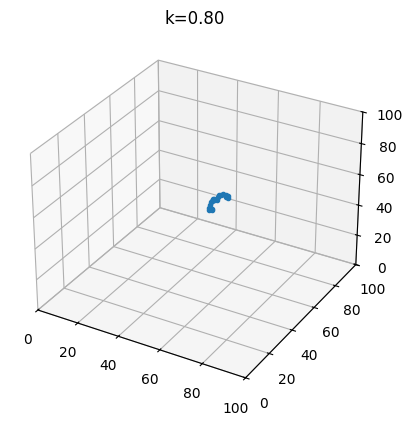

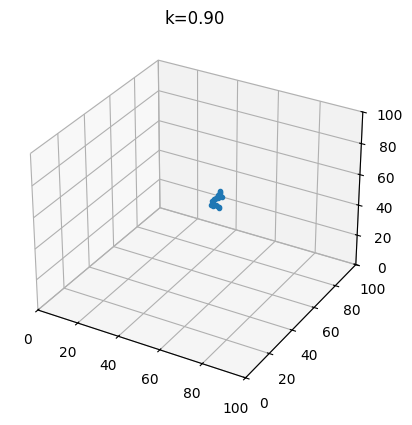

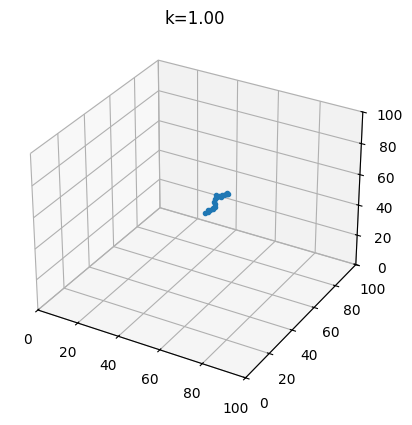

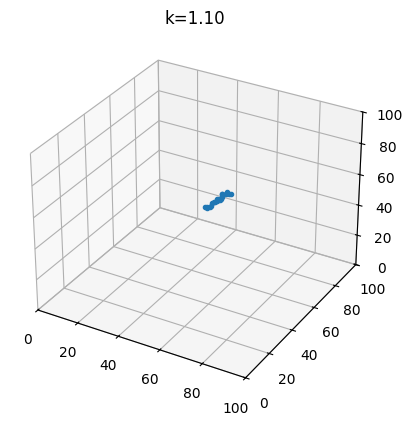

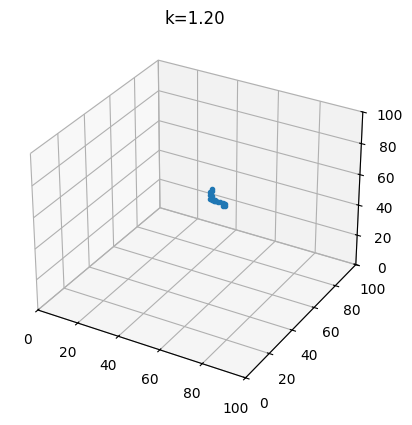

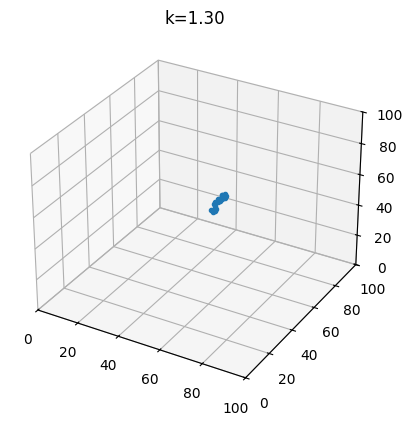

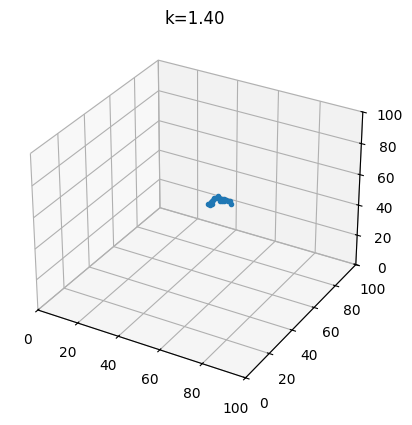

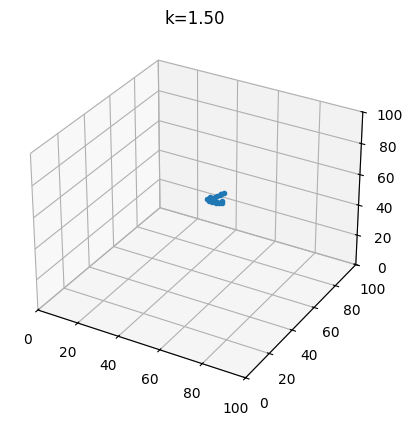

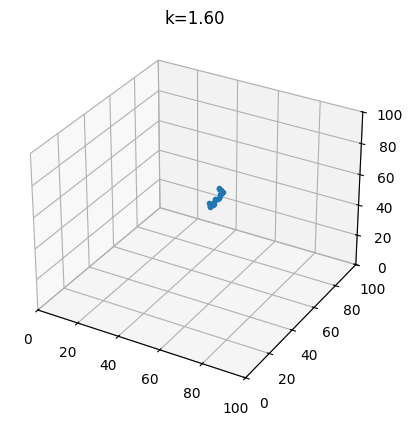

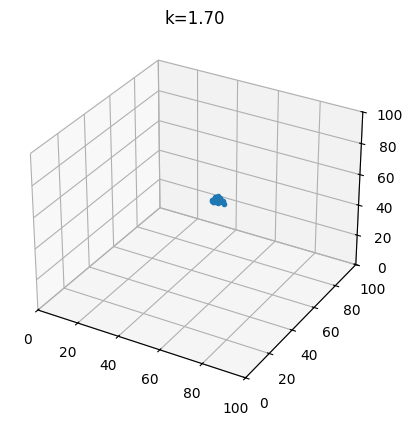

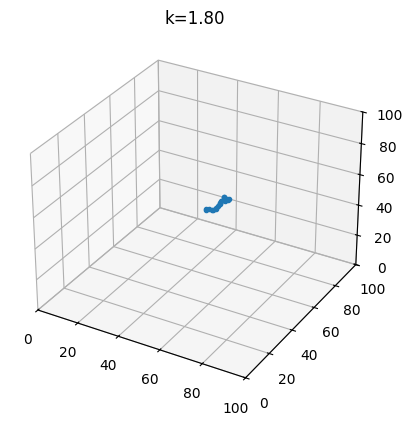

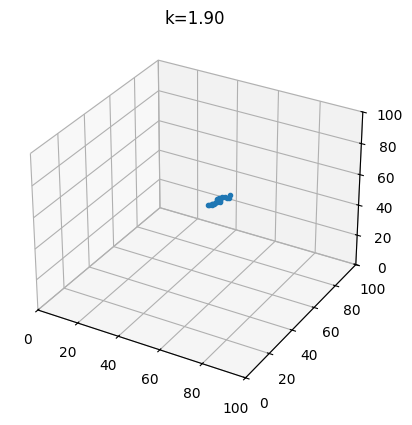

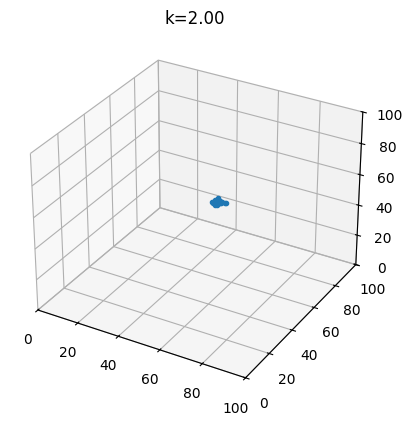

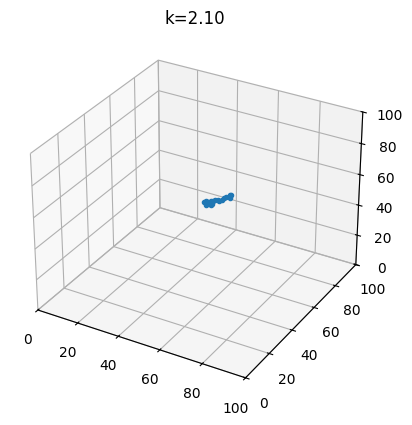

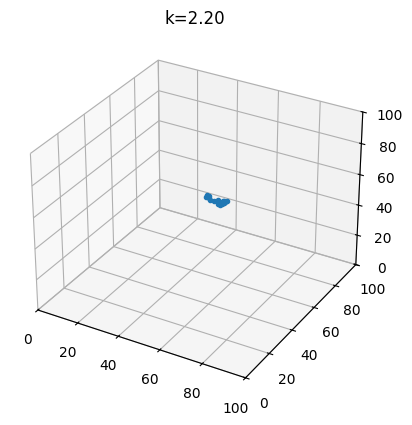

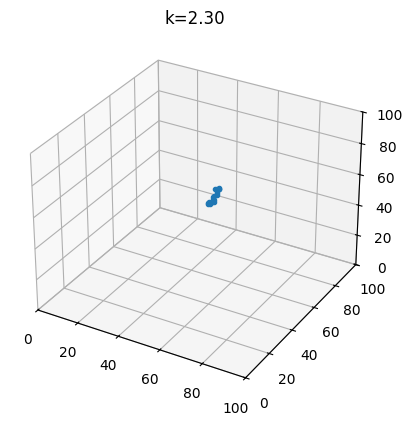

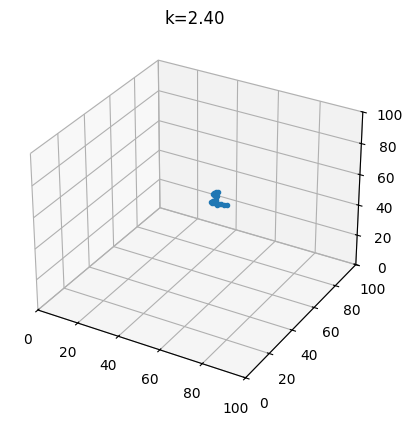

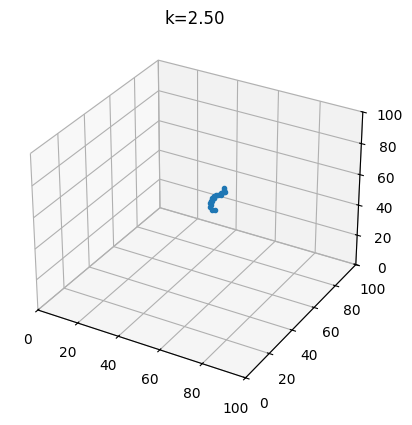

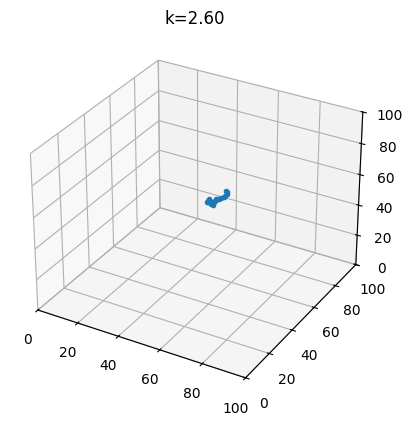

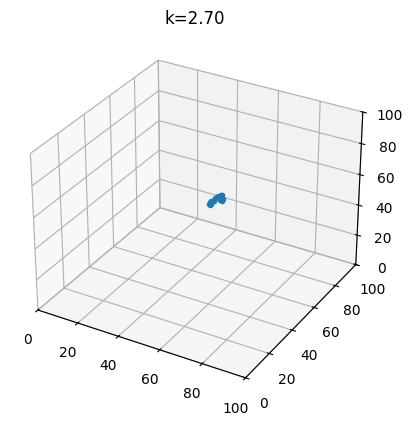

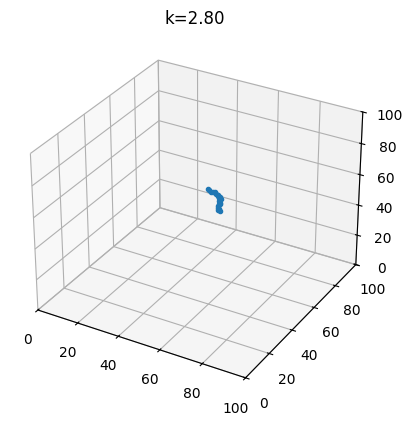

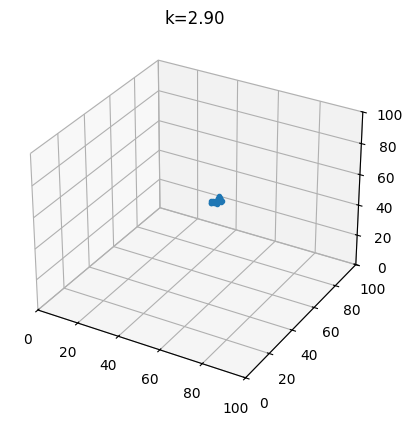

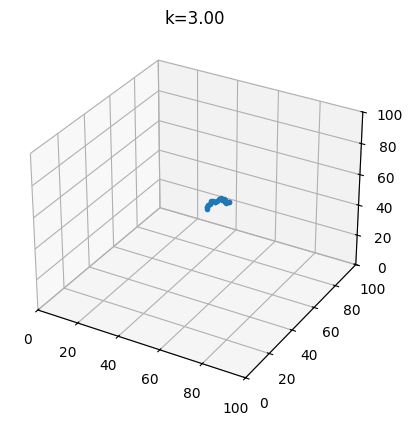

In [5]:
#Run simulation - vary k at T=0.1

# Arrays to store properties
k_values = np.linspace(0.1, 3.0, 30)
Rg_values = []
Ree_values = []
potential_energies = []

for k in k_values:
    # Set target temperature
    target_temperature = 0.1

    # (Re-initialize positions and velocities)
    positions = md.initialize_chain(n_particles, box_size, r0)
    velocities = md.initialize_velocities(n_particles, target_temperature, mass)
    # Run simulation
    for step in range(total_steps):
        # Compute forces
        forces_harmonic = md.compute_harmonic_forces(positions, k, r0, box_size)
        forces_repulsive = md.compute_lennard_jones_forces(positions, epsilon_repulsive, sigma, box_size, 'repulsive')
        forces_attractive = md.compute_lennard_jones_forces(positions, epsilon_attractive, sigma, box_size, 'attractive')
        total_forces = forces_harmonic + forces_repulsive + forces_attractive
        
        # Integrate equations of motion
        positions, velocities, total_forces = md.velocity_verlet(positions, velocities, total_forces, dt, mass)
        
        # Apply thermostat
        if step % rescale_interval == 0:
            velocities = md.rescale_velocities(velocities, target_temperature, mass)
        
    # Compute properties
    # Compute radius of gyration and end to end distance
    Rg = af.calculate_radius_of_gyration(positions)
    Ree = af.calculate_end_to_end_distance(positions)
    Rg_values.append(Rg)
    Ree_values.append(Ree)
    # Compute potential energies
    harmonic_pe = af.calculate_harmonic_pe(positions, k)
    repulsive_lj_pe = af.calculate_lj_pe(positions, 'repulsive')
    attractive_lj_pe = af.calculate_lj_pe(positions, 'attractive')
    potential_energies.append(harmonic_pe + repulsive_lj_pe + attractive_lj_pe)

    plot_polymer_3d(positions, path = f"simulation2_images/k={k:.2f}.png", box_size=100.0, title=f"k={k:.2f}", )


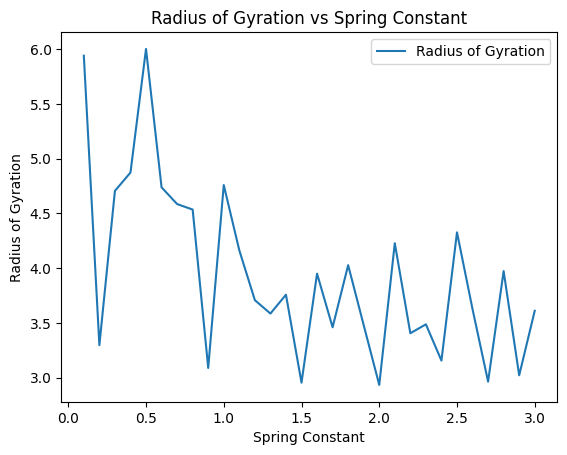

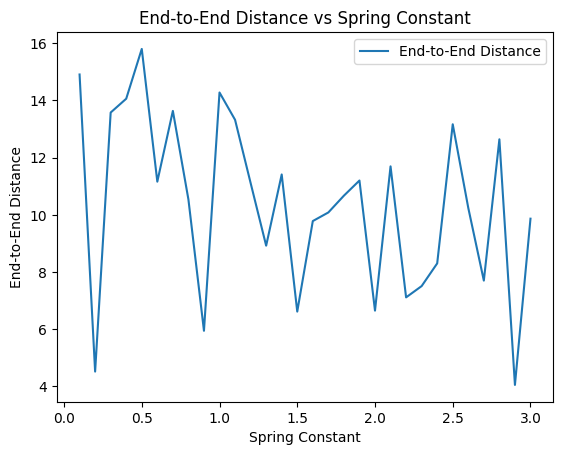

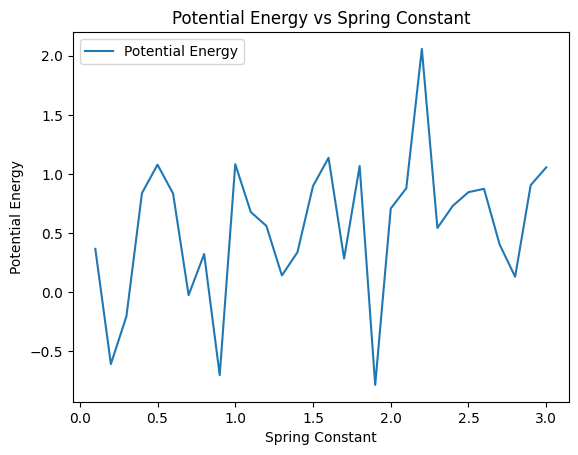

In [6]:
#Plot Simulation 2
# Plotting
plt.figure()
plt.plot(k_values, Rg_values, label='Radius of Gyration')
plt.xlabel('Spring Constant')
plt.ylabel('Radius of Gyration')
plt.title('Radius of Gyration vs Spring Constant')
plt.legend()
plt.show()

plt.figure()
plt.plot(k_values, Ree_values, label='End-to-End Distance')
plt.xlabel('Spring Constant')
plt.ylabel('End-to-End Distance')
plt.title('End-to-End Distance vs Spring Constant')
plt.legend()
plt.show()

plt.figure()
plt.plot(k_values, potential_energies, label='Potential Energy')
plt.xlabel('Spring Constant')
plt.ylabel('Potential Energy')
plt.title('Potential Energy vs Spring Constant')
plt.legend()
plt.show()

## Simulation 3 - Vary epsilon

/var/folders/b2/cy922l_54kq_yfrclxsgg8jr0000gn/T/ipykernel_14699/3192910551.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


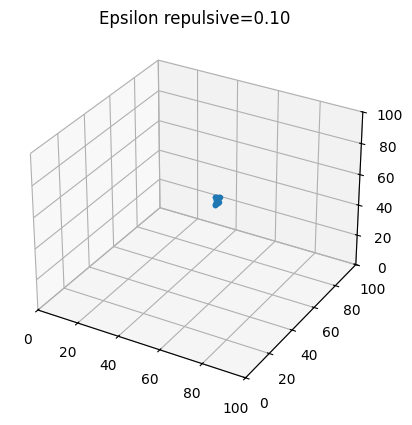

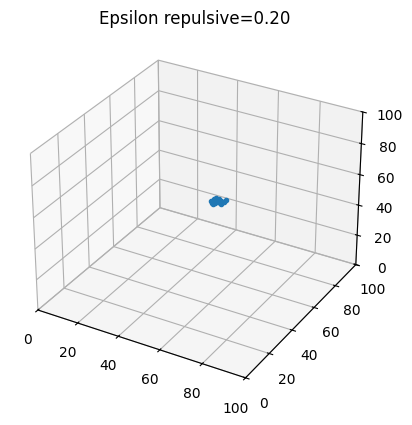

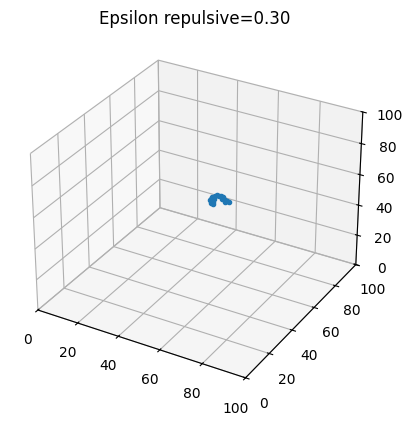

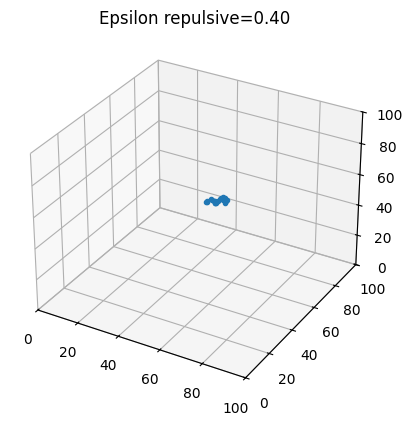

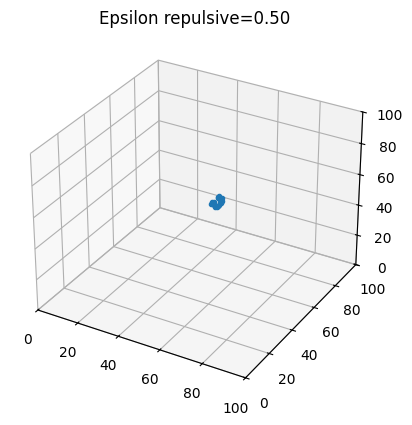

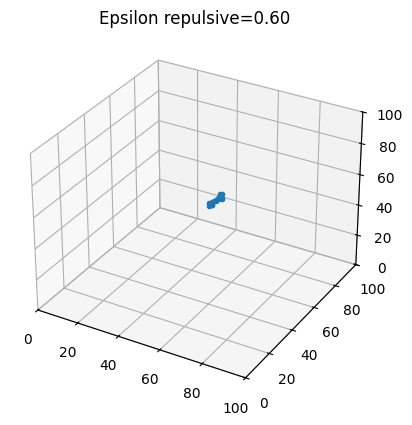

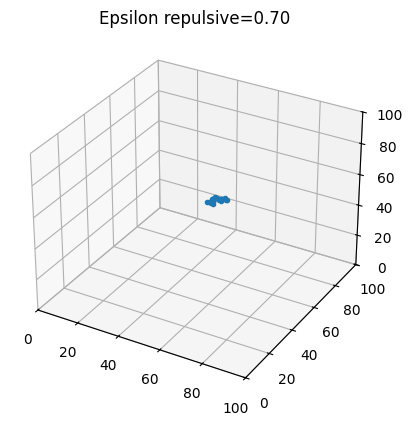

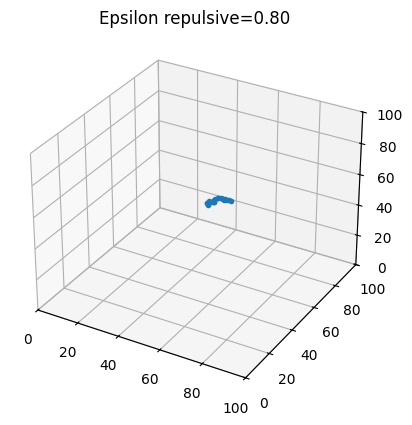

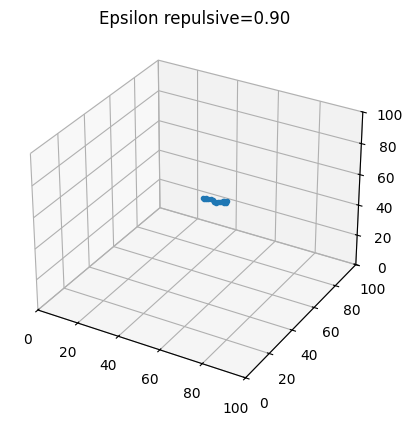

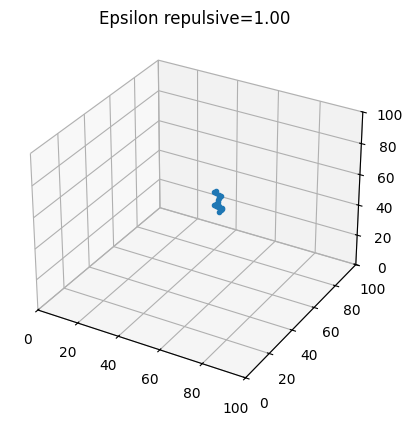

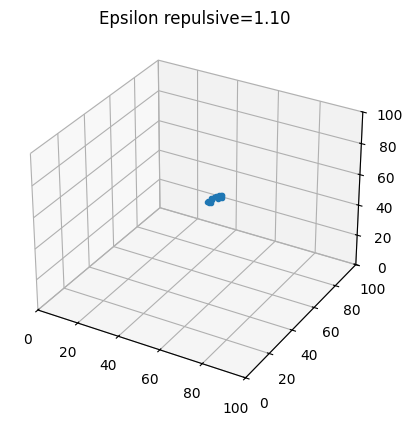

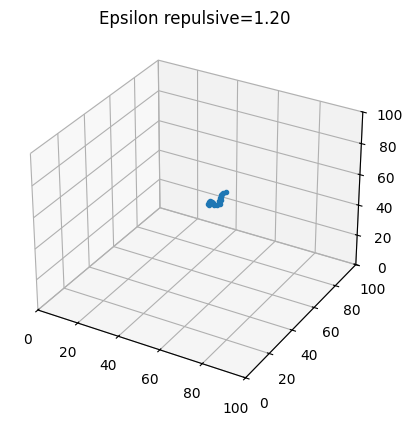

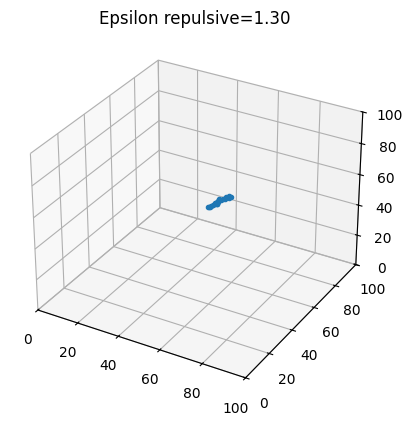

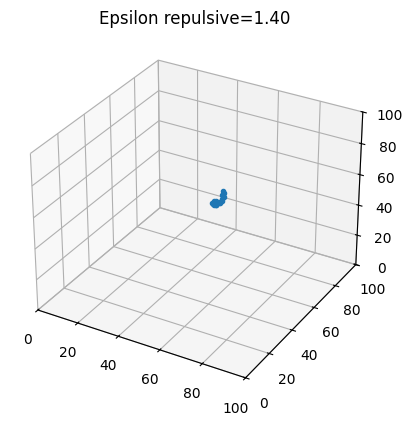

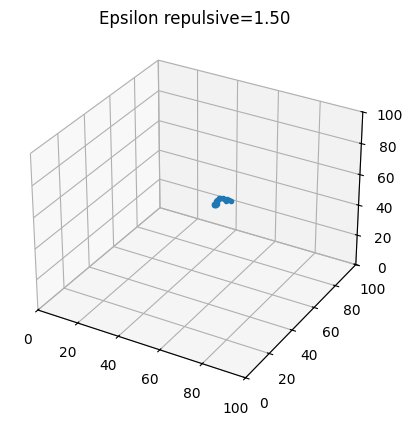

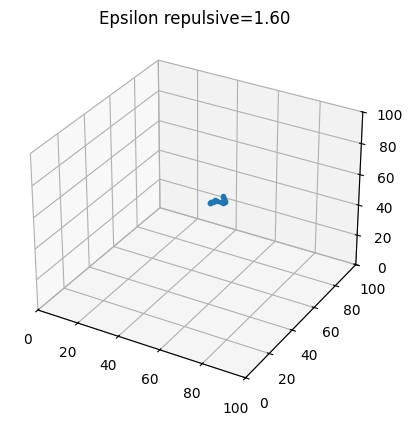

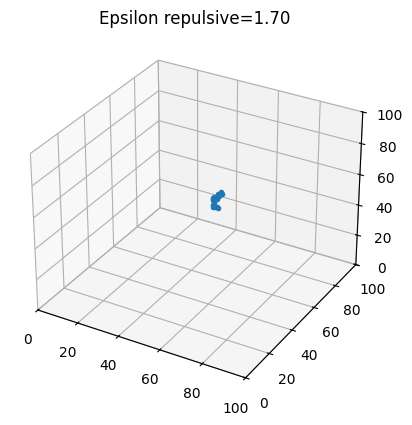

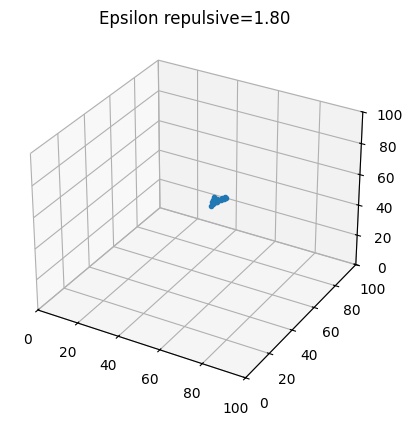

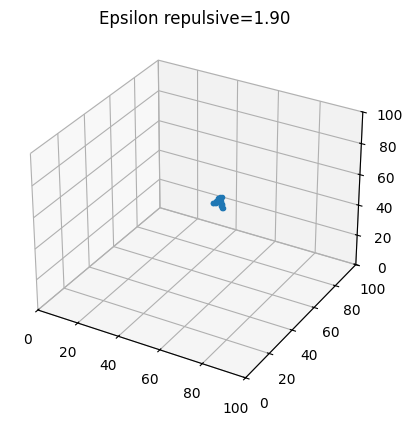

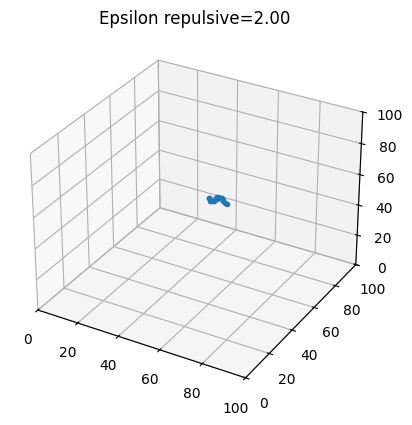

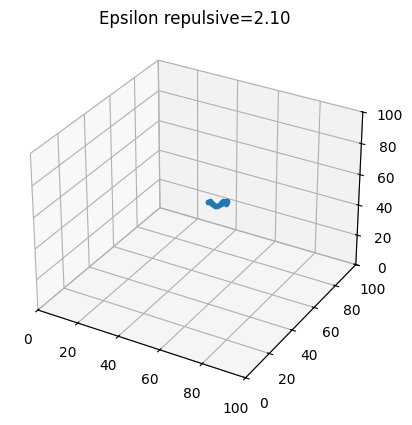

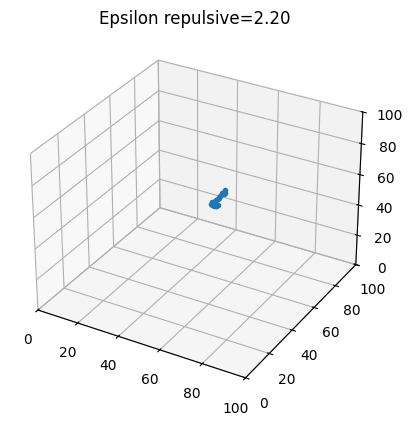

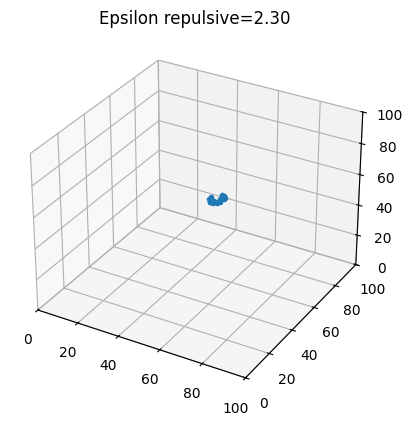

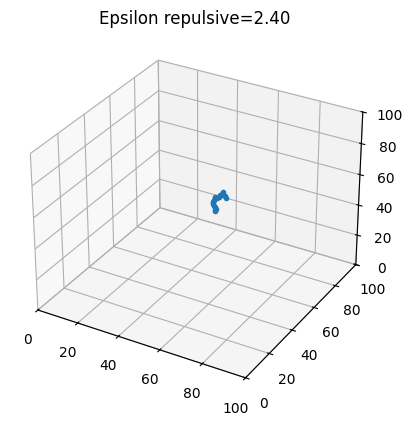

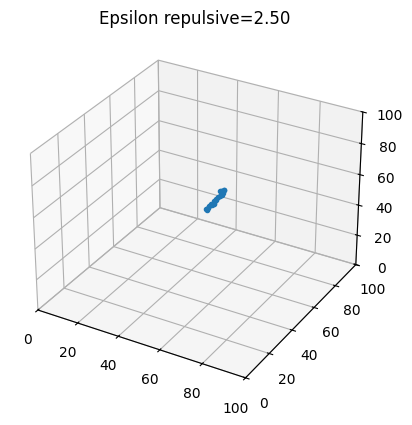

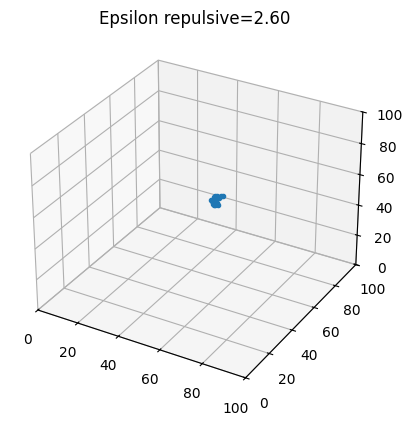

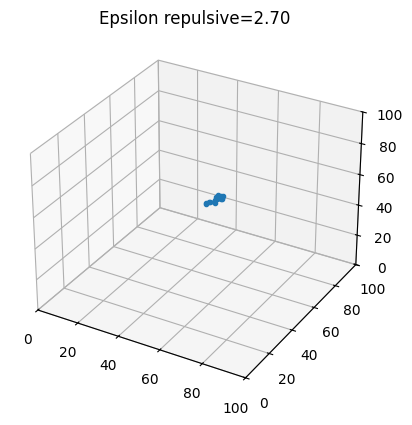

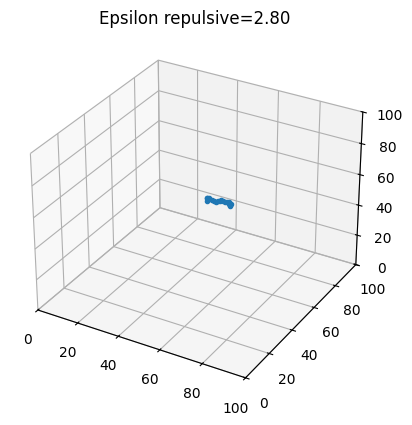

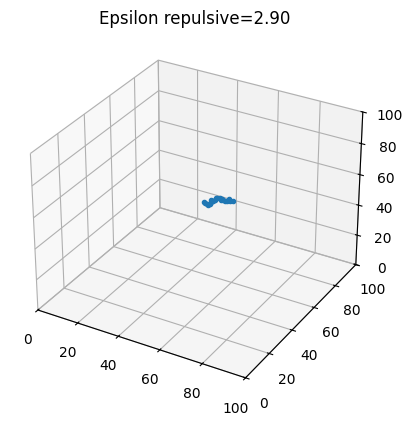

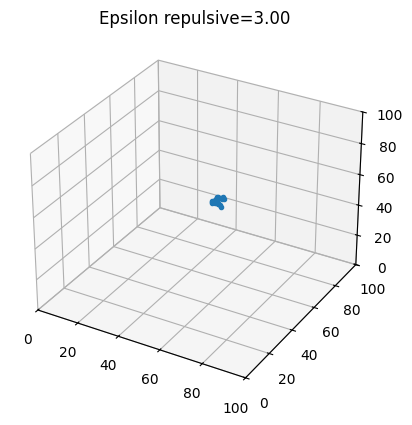

In [7]:
#Run simulation - vary k at T=0.1

# Arrays to store properties
epsilon_values = np.linspace(0.1, 3.0, 30)
Rg_values = []
Ree_values = []
potential_energies = []

for epsilon_repulsive in epsilon_values:
    # Set target temperature
    target_temperature = 0.1

    # (Re-initialize positions and velocities)
    positions = md.initialize_chain(n_particles, box_size, r0)
    velocities = md.initialize_velocities(n_particles, target_temperature, mass)
    # Run simulation
    for step in range(total_steps):
        # Compute forces
        forces_harmonic = md.compute_harmonic_forces(positions, k, r0, box_size)
        forces_repulsive = md.compute_lennard_jones_forces(positions, epsilon_repulsive, sigma, box_size, 'repulsive')
        forces_attractive = md.compute_lennard_jones_forces(positions, epsilon_attractive, sigma, box_size, 'attractive')
        total_forces = forces_harmonic + forces_repulsive + forces_attractive
        
        # Integrate equations of motion
        positions, velocities, total_forces = md.velocity_verlet(positions, velocities, total_forces, dt, mass)
        
        # Apply thermostat
        if step % rescale_interval == 0:
            velocities = md.rescale_velocities(velocities, target_temperature, mass)
        
    # Compute properties
    # Compute radius of gyration and end to end distance
    Rg = af.calculate_radius_of_gyration(positions)
    Ree = af.calculate_end_to_end_distance(positions)
    Rg_values.append(Rg)
    Ree_values.append(Ree)
    # Compute potential energies
    harmonic_pe = af.calculate_harmonic_pe(positions, k)
    repulsive_lj_pe = af.calculate_lj_pe(positions, 'repulsive')
    attractive_lj_pe = af.calculate_lj_pe(positions, 'attractive')
    potential_energies.append(harmonic_pe + repulsive_lj_pe + attractive_lj_pe)

    plot_polymer_3d(positions, path = f"simulation3_images/Epsilon repulsive={epsilon_repulsive:.2f}.png", box_size = 100.0, title=f"Epsilon repulsive={epsilon_repulsive:.2f}")


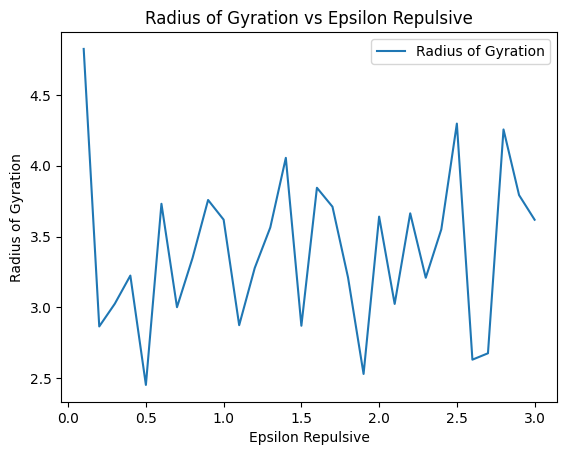

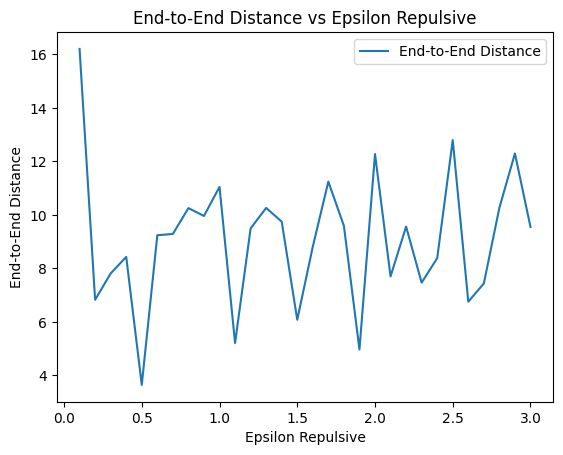

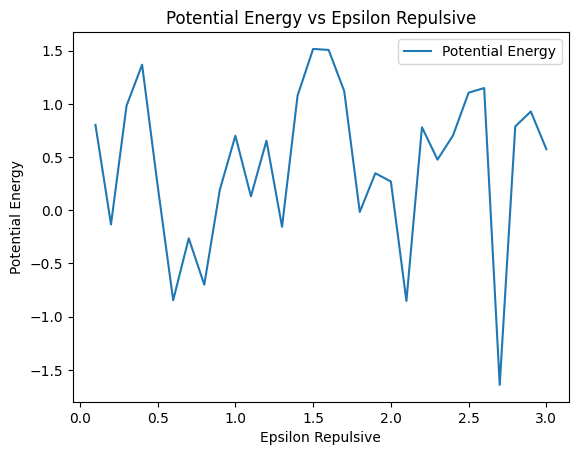

In [8]:
#Plot Simulation 2
# Plotting
plt.figure()
plt.plot(epsilon_values, Rg_values, label='Radius of Gyration')
plt.xlabel('Epsilon Repulsive')
plt.ylabel('Radius of Gyration')
plt.title('Radius of Gyration vs Epsilon Repulsive')
plt.legend()
plt.show()

plt.figure()
plt.plot(epsilon_values, Ree_values, label='End-to-End Distance')
plt.xlabel('Epsilon Repulsive')
plt.ylabel('End-to-End Distance')
plt.title('End-to-End Distance vs Epsilon Repulsive')
plt.legend()
plt.show()

plt.figure()
plt.plot(epsilon_values, potential_energies, label='Potential Energy')
plt.xlabel('Epsilon Repulsive')
plt.ylabel('Potential Energy')
plt.title('Potential Energy vs Epsilon Repulsive')
plt.legend()
plt.show()